# Refrigeration Analysis

For this assignment, the dataset was modified before loading it here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Assignment.xlsx')

In [3]:
data.head()

,Timestamp,P1,T1,P2,T2,P3,T3,P4,T4
0,2017-08-01 00:00:00,2.2585,4.810,3.2310,0.495,0.0,8.93,0.3080,3.340
1,2017-08-01 00:01:00,2.2035,3.900,3.1880,0.245,0.0,8.90,1.3380,3.435
2,2017-08-01 00:02:00,2.1300,3.155,3.1845,0.000,0.0,8.87,2.3695,2.715
3,2017-08-01 00:03:00,2.1425,2.715,3.1695,-0.215,0.0,8.81,2.2265,2.125
4,2017-08-01 00:04:00,1.2250,2.310,3.1735,-0.495,0.0,8.81,2.2310,1.745


As we can see, the columns P1, T1 denote the **Power Supply** and the **Temperature** Columns for the first refridgeration unit. The same goes for other units as well. Below are the details of the dataset

Column(s) | Definition
--- | -----------
Timestamp | Time at the instant of taking the reading. Readings taken at 1-min intervals over ten days
P1, P2, P3, P4 | Power Readings for Units 1,2,3 & 4 respectively (in kW)
T1, T2, T3, T4 | Temperature Readings for Units 1,2,3 & 4 respectively (in Celsius)

Let's explore the dataset a little bit.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  14400 non-null  datetime64[ns]
 1   P1         14323 non-null  float64       
 2   T1         14400 non-null  float64       
 3   P2         13906 non-null  float64       
 4   T2         14013 non-null  float64       
 5   P3         14167 non-null  float64       
 6   T3         14400 non-null  float64       
 7   P4         13158 non-null  float64       
 8   T4         14330 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1012.6 KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P1,14323.0,1.123395,0.919815,0.000,0.2935,0.3210,2.166500,3.055500
T1,14400.0,3.815729,2.035919,1.650,2.8400,3.8050,4.530000,102.375000
P2,13906.0,1.708434,1.502829,0.000,0.3900,0.3950,3.332875,4.036500
T2,14013.0,2.088892,3.372782,-4.090,-0.3400,2.0550,4.310000,102.625000
P3,14167.0,1.603641,0.905182,0.000,0.2800,2.0855,2.152000,6.038333
T3,14400.0,4.118913,3.401599,1.090,2.1800,2.8400,4.215000,101.905000
P4,13158.0,1.372093,0.992891,0.000,0.3095,1.3550,2.363000,6.060000
T4,14330.0,2.944373,2.576478,0.185,1.6200,2.4350,3.340000,101.655000


---
Let's Take the _Date_, _Hour_ and _Minute_ out of the **Timestamp** Column for simplicity, since we know the readings have been taken at an interval of 1 minute.

In [6]:
data['Date'] = pd.to_datetime(data['Timestamp']).dt.date
data['Hour'] = pd.to_datetime(data['Timestamp']).dt.hour
data['Minute'] = pd.to_datetime(data['Timestamp']).dt.minute
data.head()

,Timestamp,P1,T1,P2,T2,P3,T3,P4,T4,Date,Hour,Minute
0,2017-08-01 00:00:00,2.2585,4.810,3.2310,0.495,0.0,8.93,0.3080,3.340,2017-08-01,0,0
1,2017-08-01 00:01:00,2.2035,3.900,3.1880,0.245,0.0,8.90,1.3380,3.435,2017-08-01,0,1
2,2017-08-01 00:02:00,2.1300,3.155,3.1845,0.000,0.0,8.87,2.3695,2.715,2017-08-01,0,2
3,2017-08-01 00:03:00,2.1425,2.715,3.1695,-0.215,0.0,8.81,2.2265,2.125,2017-08-01,0,3
4,2017-08-01 00:04:00,1.2250,2.310,3.1735,-0.495,0.0,8.81,2.2310,1.745,2017-08-01,0,4


In [7]:
data.columns

Index(['Timestamp', 'P1', 'T1', 'P2', 'T2', 'P3', 'T3', 'P4', 'T4', 'Date',
       'Hour', 'Minute'],
      dtype='object')

In [8]:
# Simplifying the Dataframe
data = data[['Date', 'Hour', 'Minute', 'P1', 'T1', 'P2', 'T2', 'P3', 'T3', 'P4', 'T4']]
data.head()

,Date,Hour,Minute,P1,T1,P2,T2,P3,T3,P4,T4
0,2017-08-01,0,0,2.2585,4.810,3.2310,0.495,0.0,8.93,0.3080,3.340
1,2017-08-01,0,1,2.2035,3.900,3.1880,0.245,0.0,8.90,1.3380,3.435
2,2017-08-01,0,2,2.1300,3.155,3.1845,0.000,0.0,8.87,2.3695,2.715
3,2017-08-01,0,3,2.1425,2.715,3.1695,-0.215,0.0,8.81,2.2265,2.125
4,2017-08-01,0,4,1.2250,2.310,3.1735,-0.495,0.0,8.81,2.2310,1.745


### Analyzing the non-null values

We saw earlier that the dataframe contained some missing values. We need to see the total no. of data-points which are null.

In [9]:
cols = ['P1', 'T1', 'P2', 'T2', 'P3', 'T3', 'P4', 'T4']

na_total=0

# list of null values in each column
na = []
for col in cols:
    na.append(len(data[data[col].isnull()]))
    na_total += len(data[data[col].isnull()])

# Total no of missing data-points
na_total

2503

In [10]:
na

[77, 0, 494, 387, 233, 0, 1242, 70]

In [11]:
# Mapping between columns names and the no. of null values
na_dict = {}

for i in range(len(cols)):
    na_dict[cols[i]]=na[i]

In [12]:
na_dict

{'P1': 77,
 'T1': 0,
 'P2': 494,
 'T2': 387,
 'P3': 233,
 'T3': 0,
 'P4': 1242,
 'T4': 70}

In [13]:
# Percentage of missing data-points
na_total/(8*len(data)) * 100

2.1727430555555554

In [14]:
# Percentage of rows containing missing values
(len(data)-len(data.dropna()))/len(data) * 100

13.979166666666668

In [15]:
# No. of rows containing missing values
len(data)-len(data.dropna())

2013

The percentage of null data-points is quite less than that of rows containing null values. Hence dropping the null values won't be conducive to our analysis. 

Instead, we can replace the null values with **zero**.

In [16]:
mod_data = data.fillna(0)

In [17]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    14400 non-null  object 
 1   Hour    14400 non-null  int64  
 2   Minute  14400 non-null  int64  
 3   P1      14400 non-null  float64
 4   T1      14400 non-null  float64
 5   P2      14400 non-null  float64
 6   T2      14400 non-null  float64
 7   P3      14400 non-null  float64
 8   T3      14400 non-null  float64
 9   P4      14400 non-null  float64
 10  T4      14400 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.2+ MB


In [18]:
mod_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,14400.0,11.500000,6.922427,0.00,5.7500,11.50000,17.2500,23.000000
Minute,14400.0,29.500000,17.318704,0.00,14.7500,29.50000,44.2500,59.000000
P1,14400.0,1.117388,0.921004,0.00,0.2930,0.32100,2.1655,3.055500
T1,14400.0,3.815729,2.035919,1.65,2.8400,3.80500,4.5300,102.375000
P2,14400.0,1.649825,1.509209,0.00,0.3895,0.39450,3.3185,4.036500
T2,14400.0,2.032753,3.344255,-4.09,-0.2500,1.90500,4.2750,102.625000
P3,14400.0,1.577693,0.920346,0.00,0.2780,2.08300,2.1490,6.038333
T3,14400.0,4.118913,3.401599,1.09,2.1800,2.84000,4.2150,101.905000
P4,14400.0,1.253750,1.024295,0.00,0.3085,1.27225,2.3555,6.060000
T4,14400.0,2.930061,2.578354,0.00,1.5900,2.43500,3.3100,101.655000


In [19]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,14400.0,11.500000,6.922427,0.000,5.7500,11.5000,17.250000,23.000000
Minute,14400.0,29.500000,17.318704,0.000,14.7500,29.5000,44.250000,59.000000
P1,14323.0,1.123395,0.919815,0.000,0.2935,0.3210,2.166500,3.055500
T1,14400.0,3.815729,2.035919,1.650,2.8400,3.8050,4.530000,102.375000
P2,13906.0,1.708434,1.502829,0.000,0.3900,0.3950,3.332875,4.036500
T2,14013.0,2.088892,3.372782,-4.090,-0.3400,2.0550,4.310000,102.625000
P3,14167.0,1.603641,0.905182,0.000,0.2800,2.0855,2.152000,6.038333
T3,14400.0,4.118913,3.401599,1.090,2.1800,2.8400,4.215000,101.905000
P4,13158.0,1.372093,0.992891,0.000,0.3095,1.3550,2.363000,6.060000
T4,14330.0,2.944373,2.576478,0.185,1.6200,2.4350,3.340000,101.655000


#### We can clearly see that the modified data is not much different in terms of distribution than the original ones.

Let's answer the assignment questions.

### Set Temperature Range 

We can see that the standard range (min-max) of the temperature across all the units. However, this range does not give a conclusive idea about the spread of data. Hence we need different ranges in terms of percentiles. Below is how we calculate a percentile value.  

In [20]:
# 25 percentile (first Quartile)
mod_data['T1'].quantile([.25])[0.25]

2.84

In [21]:
# third quartile
mod_data['T1'].quantile([.75])[0.75]

4.53

In [22]:
# 10 percentile
mod_data['T1'].quantile([.1])[0.1]

2.405

We need to put these values in a range and store them in a dataframe. The ranges are:

- Standard Range (min-max)
- Q1 - Q3 Range
- 10 - 90 Percentile Range
- 5 - 95 Percentile Range

In [23]:
# List of standard ranges
T_list = []

# List of Q1-O3 Ranges
Tq_list = []

# List of 10 - 90 Percentile Ranges
T19_list = []

#List of 5 - 95 Percentile Ranges
T595_list = []

T_cols = ['T1', 'T2', 'T3', 'T4']

for col in T_cols:
    T_list.append(f'{round(mod_data[col].min(),2)} - {round(mod_data[col].max(),2)}')
    Tq_list.append(f'{round(mod_data[col].quantile([.25])[0.25],2)} - {round(mod_data[col].quantile([.75])[0.75],2)}')
    T19_list.append(f'{round(mod_data[col].quantile([.1])[0.1],2)} - {round(mod_data[col].quantile([.9])[0.9],2)}')
    T595_list.append(f'{round(mod_data[col].quantile([.05])[0.05],2)} - {round(mod_data[col].quantile([.95])[0.95],2)}')

# Putting the lists into a dataframe
temp_range = pd.DataFrame({'Unit' : [1, 2, 3, 4],
                           'Min - Max' : T_list, 
                           'Q1 - Q3' : Tq_list,
                           '10 - 90 (%)ile': T19_list,
                           '5 - 95 (%)ile' : T595_list})

temp_range

,Unit,Min - Max,Q1 - Q3,10 - 90 (%)ile,5 - 95 (%)ile
0,1,1.65 - 102.38,2.84 - 4.53,2.4 - 4.84,2.28 - 4.9
1,2,-4.09 - 102.62,-0.25 - 4.28,-1.74 - 5.31,-2.28 - 5.78
2,3,1.09 - 101.91,2.18 - 4.22,1.87 - 9.44,1.78 - 11.78
3,4,0.0 - 101.66,1.59 - 3.31,1.25 - 4.09,1.06 - 7.81


---
Let's export this dataframe

In [24]:
# temp_range.to_excel('Temp Range.xlsx', index=False)

---
## Simple Analysis

Here, we will calculate our metrics with respect to only the units. We won't dig deeper into their daily or hourly data.

### Duty Cycle

Duty Cycle is defined as the percentage of the time that the fridge is on, i.e.,

Duty Cycle = 100 * (Time on) / (Time on + Time off)

Since the rows in our dataset represent 1 minute intervals, we can simply count the no of rows in columns P1, P2, P3 and P4 where the value is **0**, to get the value of **Time off**. The remaining no. of rows represent **Time on**. 

Using this, we can find the duty cycles of each unit and put them into a DataFrame

In [25]:
def compute_duty_cycle(data):
    
    l = []
    for col in ['P1','P2','P3','P4']:
        dc = round(100*(len(data)-len(data[data[col] == 0]))/len(data),2)
        l.append(dc)
        
    dic = {'Unit': [1, 2, 3, 4],
           'Duty Cycle (%)' : l}
    
    return pd.DataFrame(dic)

In [26]:
compute_duty_cycle(mod_data)

,Unit,Duty Cycle (%)
0,1,97.17
1,2,94.51
2,3,90.19
3,4,91.12


#### Let's Visualize the results

In [27]:
sns.set_style('whitegrid')

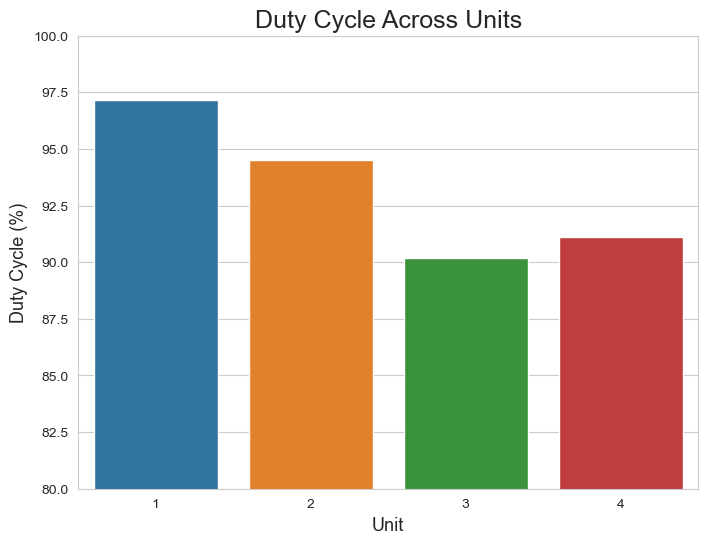

In [28]:
duty_cycle = compute_duty_cycle(mod_data)

plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x='Unit', y='Duty Cycle (%)', data=duty_cycle)
plt.xlabel('Unit', fontsize=13)
plt.ylabel('Duty Cycle (%)', fontsize=13)
plt.title('Duty Cycle Across Units', fontsize=18)
plt.ylim((80,100))
plt.show()

---

### Percentage of Temperature Compliance

This metric is defined as the percentage of the times the temperature of the unit is in the range of (1-4) degree celsius. We can follow the remaining steps from duty cycle calculation

In [29]:
def compute_pc_temp_comp(data):
    
    l = []
    for col in ['T1','T2','T3','T4']:
        pc = round(len(data[(data[col] >= 1) & (data[col] <= 4)])/len(data) * 100, 2)
        l.append(pc)
        
    dic = {'Unit': [1, 2, 3, 4],
           'TC (%)' : l}
    
    return pd.DataFrame(dic)

In [30]:
compute_pc_temp_comp(mod_data)

,Unit,TC (%)
0,1,55.79
1,2,30.66
2,3,73.12
3,4,85.74


**Visualization**

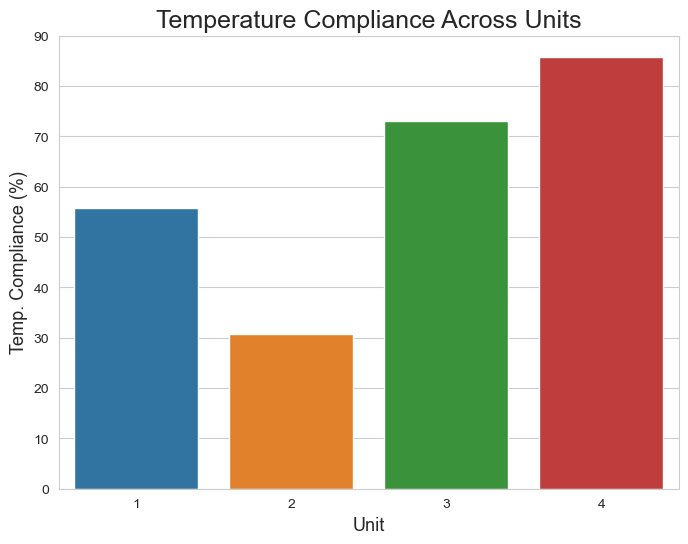

In [31]:
pc_compliance = compute_pc_temp_comp(mod_data)

plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x='Unit', y='TC (%)', data=pc_compliance)
plt.xlabel('Unit', fontsize=13)
plt.ylabel('Temp. Compliance (%)', fontsize=13)
plt.title('Temperature Compliance Across Units', fontsize=18)
plt.ylim((0,90))
plt.show()

---

### Average Daily Consumption

For this part, we need to sum up the power reading across all the rows and divide them by **60** to get the energy consumption in KWh. Dividing the above result by **10** would give the average daily energy consumption  

In [32]:
def avg_energy_consumption(data):
    
    l = []
    for col in ['P1','P2','P3','P4']:
        ec = round(data[col].sum()/(10*60),2)
        l.append(ec)
        
    dic = {'Unit': [1, 2, 3, 4],
           'Avg Daily Consumption (kWh)' : l}
    
    return pd.DataFrame(dic)

In [33]:
avg_energy_consumption(data)

,Unit,Avg Daily Consumption (kWh)
0,1,26.82
1,2,39.60
2,3,37.86
3,4,30.09


#### Viz.

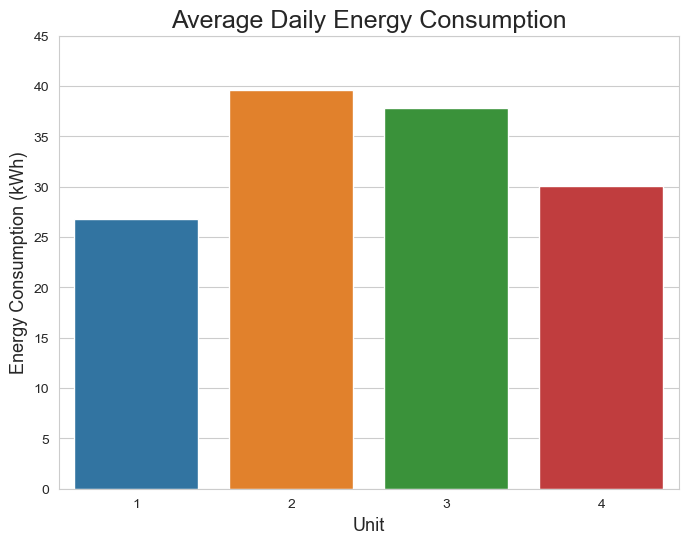

In [34]:
daily_ec = avg_energy_consumption(mod_data)

plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x='Unit', y='Avg Daily Consumption (kWh)', data=daily_ec)
plt.xlabel('Unit', fontsize=13)
plt.ylabel('Energy Consumption (kWh)', fontsize=13)
plt.title('Average Daily Energy Consumption', fontsize=18)
plt.ylim((0,45))
plt.show()

---
## Advanced Analysis

Here, we will go into deeper into the analysis of each of the above metrics. We'll analyze them on a daily as well as, hourly basis.

#### Let's transform our data into a more readable form

We will separate the data corressponding to each of the 4 Units and concatenate them on top of each other. We will also add a column denoting the Unit number. This way, we will have only two columns for Power Supply and Temperature, instead of eight.

In [35]:
unit1 = mod_data[['Date','Hour', 'P1', 'T1']]
unit2 = mod_data[['Date','Hour', 'P2', 'T2']]
unit3 = mod_data[['Date','Hour', 'P3', 'T3']]
unit4 = mod_data[['Date','Hour', 'P4', 'T4']]

df_list = [unit1, unit2, unit3, unit4]

for i, df in enumerate(df_list):
    df.insert(2, 'Unit', np.array([f'Unit {i+1}']*len(df)))

for df in df_list:
    df.columns = ['Date', 'Hour', 'Unit', 'Power Supply', 'Temperature']

unit2.head()

,Date,Hour,Unit,Power Supply,Temperature
0,2017-08-01,0,Unit 2,3.2310,0.495
1,2017-08-01,0,Unit 2,3.1880,0.245
2,2017-08-01,0,Unit 2,3.1845,0.000
3,2017-08-01,0,Unit 2,3.1695,-0.215
4,2017-08-01,0,Unit 2,3.1735,-0.495


In [36]:
interim = pd.concat(df_list)
interim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57600 entries, 0 to 14399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          57600 non-null  object 
 1   Hour          57600 non-null  int64  
 2   Unit          57600 non-null  object 
 3   Power Supply  57600 non-null  float64
 4   Temperature   57600 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.6+ MB


In [37]:
interim.head()

,Date,Hour,Unit,Power Supply,Temperature
0,2017-08-01,0,Unit 1,2.2585,4.810
1,2017-08-01,0,Unit 1,2.2035,3.900
2,2017-08-01,0,Unit 1,2.1300,3.155
3,2017-08-01,0,Unit 1,2.1425,2.715
4,2017-08-01,0,Unit 1,1.2250,2.310


### Vizualizing Temperature Range

Let's see a boxplot of the temperature for each unit

(-5.0, 25.0)

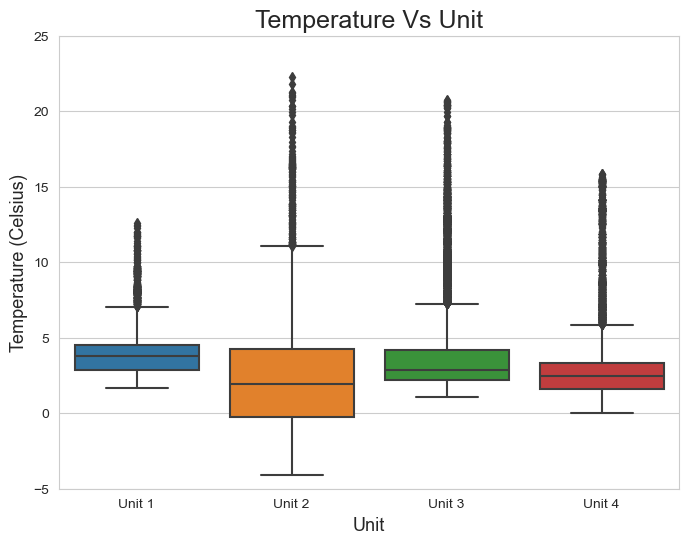

In [38]:
plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(x='Unit', y='Temperature',data=interim)
plt.xlabel('Unit', fontsize=13)
plt.ylabel('Temperature (Celsius)', fontsize=13)
plt.title('Temperature Vs Unit', fontsize=18)
plt.ylim((-5,25))

**KDE plot**

(-8.0, 20.0)

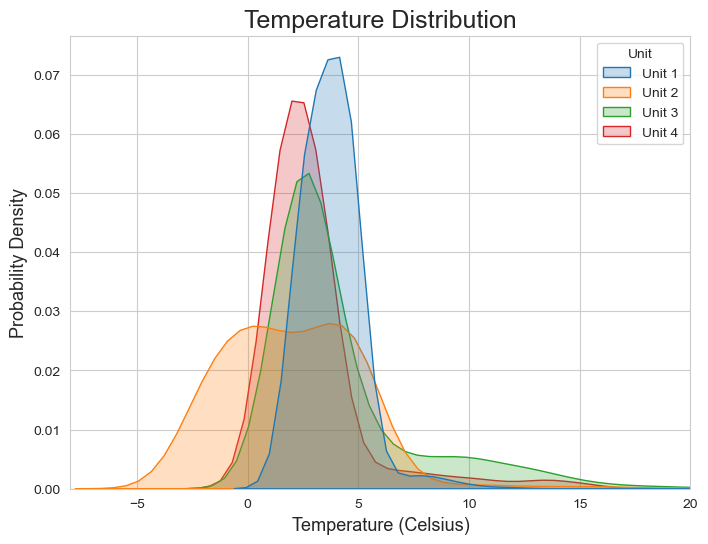

In [39]:
plt.figure(figsize=(8,6), dpi=100)
sns.kdeplot(data=interim, x='Temperature',hue='Unit',shade=True, bw_adjust=2.5)
plt.xlabel('Temperature (Celsius)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)
plt.title('Temperature Distribution', fontsize=18)
plt.xlim((-8,20))

### Calculating Duty Cycle

Before going further, let's see a grouped-by dataframe by Date and Unit

In [40]:
test = interim.groupby(['Unit','Date']).count()
test.head()

Hour  Power Supply  Temperature
Unit   Date                                       
Unit 1 2017-08-01  1440          1440         1440
       2017-08-02  1440          1440         1440
       2017-08-03  1440          1440         1440
       2017-08-04  1440          1440         1440
       2017-08-05  1440          1440         1440

We can clearly see that such a grouped by dataframe contains 1440 entries corresponding to a date for each of the Unit, as there are 10 different dates and a total of 14400 entries, for each unit. 

Let's first make a copy of the 'interim' dataframe

In [41]:
df = interim.copy()

In [42]:
# Column specifying whether the Unit was on or off at that minute 
df['On'] = df['Power Supply'].apply(lambda x: 0 if x==0 else 1)

# Calculating the "Time-on" grouping by Date follwed by Unit
dc = df.groupby(['Unit', 'Date']).sum()

# Determing the Duty Cycle. Since each day has 1440 entries, we shall
# divide the above result by this number to get the Duty Cycle
dc['Duty Cycle'] = dc['On'].apply(lambda z: round(z*100/1440, 2))

dc = dc.reset_index()
dc = dc[['Date', 'Unit', 'Duty Cycle']]
dc.head()

,Date,Unit,Duty Cycle
0,2017-08-01,Unit 1,98.26
1,2017-08-02,Unit 1,96.67
2,2017-08-03,Unit 1,98.54
3,2017-08-04,Unit 1,96.32
4,2017-08-05,Unit 1,97.71


### Calculating Temperature Compliance

In [43]:
# Column specifying whether the Unit's Temperature in the ideal range or not
df['TC'] = df['Temperature'].apply(lambda x: 1 if x >=1 and x<= 4 else 0)

# Calculating the number of times the Unit was Temp. Compliant, by date
tc = df.groupby(['Unit', 'Date']).sum()

# Calculating the percentage compliance
tc['Temp Compliance'] = tc['TC'].apply(lambda z: round(z*100/1440, 2))

tc = tc.reset_index()
tc = tc[['Date', 'Unit', 'Temp Compliance']]
tc.head()

,Date,Unit,Temp Compliance
0,2017-08-01,Unit 1,58.75
1,2017-08-02,Unit 1,52.57
2,2017-08-03,Unit 1,56.53
3,2017-08-04,Unit 1,57.01
4,2017-08-05,Unit 1,58.26


### Daily Energy Consumption

In [44]:
# Taking the average by Unit followed by Date
ec = df.groupby(['Unit', 'Date']).mean()

# Multiplying avg. Power Supply by 24 (hrs) to calculate Energy Consumption in kWh
ec['Energy Consumption'] = ec['Power Supply'].apply(lambda z: round(z*24, 2))

# Rounding the Power Supply to 2 decimal places
ec['Power Supply'] = ec['Power Supply'].apply(lambda z: round(z, 2))

ec = ec.reset_index()[['Date', 'Unit', 'Power Supply', 'Energy Consumption']]
ec.head()

,Date,Unit,Power Supply,Energy Consumption
0,2017-08-01,Unit 1,1.19,28.56
1,2017-08-02,Unit 1,1.14,27.38
2,2017-08-03,Unit 1,1.08,25.80
3,2017-08-04,Unit 1,1.16,27.88
4,2017-08-05,Unit 1,1.12,26.86


### Collating the Results into one Dataframe

In [45]:
# Making a copy of the last dataframe
daily_df = ec.copy()

# adding the Duty Cycle and Temp. Compliance Columns
daily_df['Duty Cycle (%)'] = dc['Duty Cycle']
daily_df['Temp Compliance (%)'] = tc['Temp Compliance']

# Renaming the columns
daily_df = daily_df.rename({'Power Supply': ' Avg. Power Supply (kW)', 
                            'Energy Consumption': 'Energy Consumption (kWh)'}, axis=1)
daily_df.head()

,Date,Unit,Avg. Power Supply (kW),Energy Consumption (kWh),Duty Cycle (%),Temp Compliance (%)
0,2017-08-01,Unit 1,1.19,28.56,98.26,58.75
1,2017-08-02,Unit 1,1.14,27.38,96.67,52.57
2,2017-08-03,Unit 1,1.08,25.80,98.54,56.53
3,2017-08-04,Unit 1,1.16,27.88,96.32,57.01
4,2017-08-05,Unit 1,1.12,26.86,97.71,58.26


---
#### Now, Let's Visualize the data

In [46]:
import warnings

warnings.filterwarnings('ignore')

### Duty Cycle

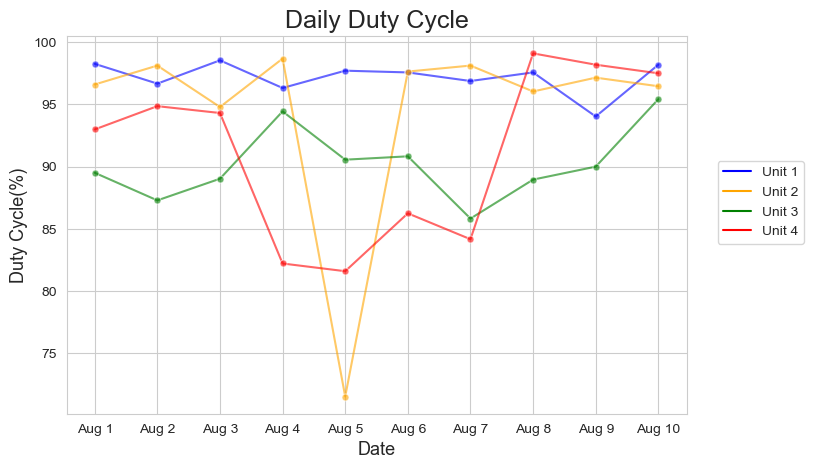

In [47]:
plt.figure(figsize=(8,5), dpi=100)
ax = plt.axes()

palette = ['blue','orange','green','red']
sns.lineplot(x='Date', y='Duty Cycle (%)', hue='Unit', palette=palette, marker='o', ms=5, alpha=0.6, data=daily_df)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Duty Cycle(%)', fontsize=13)

# Setting up x-tick labels for a cleaner viz.
prev_labels = ax.get_xticklabels()
labels = [f'Aug {i+1}' for i in range(len(prev_labels))]
ax.set_xticklabels(labels)

plt.title('Daily Duty Cycle', fontsize=18)
plt.legend(loc=(1.05,0.45))

### Temperature Compliance

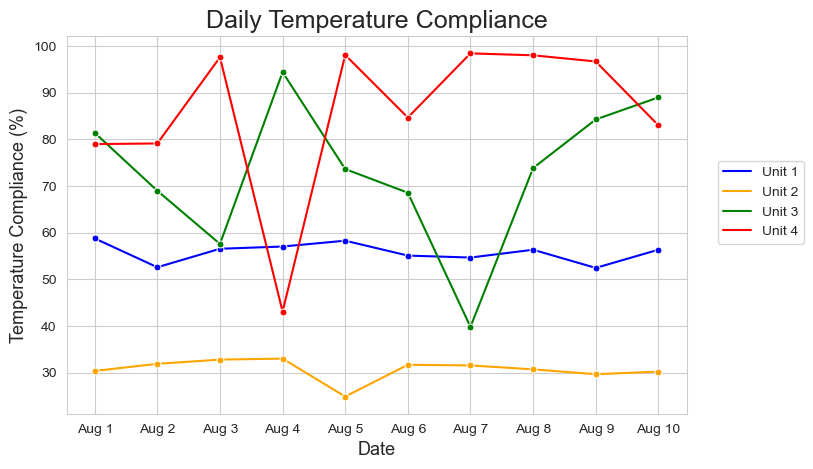

In [48]:
plt.figure(figsize=(8,5), dpi=100)
ax = plt.axes()

palette = ['blue','orange','green','red']
sns.lineplot(x='Date', y='Temp Compliance (%)', hue='Unit', palette=palette, marker='o', ms=5, data=daily_df)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Temperature Compliance (%)', fontsize=13)

# Setting up x-tick labels for a cleaner viz.
prev_labels = ax.get_xticklabels()
labels = [f'Aug {i+1}' for i in range(len(prev_labels))]
ax.set_xticklabels(labels)

plt.title('Daily Temperature Compliance', fontsize=18)
plt.legend(loc=(1.05,0.45))

### Energy Consumption

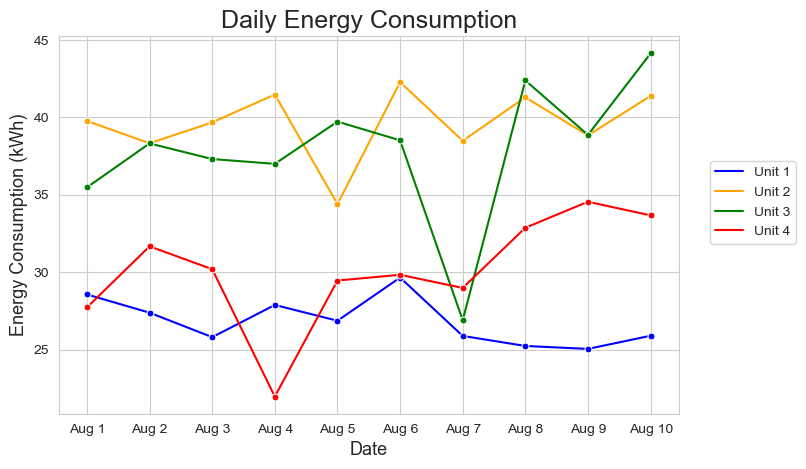

In [49]:
plt.figure(figsize=(8,5), dpi=100)
ax = plt.axes()

palette = ['blue','orange','green','red']
sns.lineplot(x='Date', y='Energy Consumption (kWh)', hue='Unit', palette=palette, marker='o', ms=5, data=daily_df)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Energy Consumption (kWh)', fontsize=13)

# Setting up x-tick labels for a cleaner viz.
prev_labels = ax.get_xticklabels()
labels = [f'Aug {i+1}' for i in range(len(prev_labels))]
ax.set_xticklabels(labels)

plt.title('Daily Energy Consumption', fontsize=18)
plt.legend(loc=(1.05,0.45))

---
## Hourly Analysis

We shall calculate the Temperature Compliance, Duty Cycle and Total Energy Consumption on an hourly basis

Let's start with creating the required dataframe

In [50]:
test1 = interim.groupby(['Unit','Hour']).count()
test1

Date  Power Supply  Temperature
Unit   Hour                                 
Unit 1 0      600           600          600
       1      600           600          600
       2      600           600          600
       3      600           600          600
       4      600           600          600
...           ...           ...          ...
Unit 4 19     600           600          600
       20     600           600          600
       21     600           600          600
       22     600           600          600
       23     600           600          600

[96 rows x 3 columns]

#### So, our dividing factor in temp compliance and Duty Cycle will be 600

Let's Calculate Duty Cycle and Temp Compliance

In [51]:
# Calculating the Temperature Compliance and Duty Cycle. These steps have been explained previously
df = interim.copy()
df['TC'] = df['Temperature'].apply(lambda x: 1 if x >=1 and x<= 4 else 0)
df['On'] = df['Power Supply'].apply(lambda x: 0 if x==0 else 1)
h = df.groupby(['Unit','Hour']).sum()
h['Temp Compliance'] = h['TC'].apply(lambda z: round(z*100/600, 2))
h['Duty Cycle'] = h['On'].apply(lambda z: round(z*100/600, 2))
h = h.reset_index()
h = h[['Hour', 'Unit', 'Duty Cycle','Temp Compliance']]
h.head()

,Hour,Unit,Duty Cycle,Temp Compliance
0,0,Unit 1,99.67,62.17
1,1,Unit 1,99.33,60.17
2,2,Unit 1,99.67,58.83
3,3,Unit 1,99.83,48.83
4,4,Unit 1,99.50,52.67


#### Energy Consumption

Here, We first need to find average power supply/unit/day/hour. This will essentially tell us the **Energy Consumption** of each unit during a particular hour on a particular day

In [52]:
day_hour = interim.groupby(['Unit','Date','Hour']).mean().reset_index()
day_hour

,Unit,Date,Hour,Power Supply,Temperature
0,Unit 1,2017-08-01,0,1.099308,3.636500
1,Unit 1,2017-08-01,1,1.128792,3.696083
2,Unit 1,2017-08-01,2,1.082983,3.653667
3,Unit 1,2017-08-01,3,1.068775,3.780500
4,Unit 1,2017-08-01,4,1.015908,3.672583
...,...,...,...,...,...
955,Unit 4,2017-08-10,19,2.039433,2.324750
956,Unit 4,2017-08-10,20,1.491867,2.313167
957,Unit 4,2017-08-10,21,1.431617,2.420917
958,Unit 4,2017-08-10,22,1.066700,3.083444


From this dataframe, we will calculate the total energy consumed by a unit at a particular hour across all the days.

In [53]:
dh = day_hour.groupby(['Unit','Hour']).sum().reset_index()
dh

,Unit,Hour,Power Supply,Temperature
0,Unit 1,0,11.464092,35.480917
1,Unit 1,1,10.934458,35.857250
2,Unit 1,2,11.281317,36.256639
3,Unit 1,3,12.500667,40.043139
4,Unit 1,4,12.961283,38.290500
...,...,...,...,...
91,Unit 4,19,15.576742,22.916472
92,Unit 4,20,14.134383,26.090333
93,Unit 4,21,13.728267,25.785083
94,Unit 4,22,13.228275,23.767306


In [54]:
# Let's Round these values

dh['Energy Consumption (kWh)'] = dh['Power Supply'].apply(lambda x: round(x,2))
dh = dh[['Hour','Unit', 'Energy Consumption (kWh)']]
dh.head()

,Hour,Unit,Energy Consumption (kWh)
0,0,Unit 1,11.46
1,1,Unit 1,10.93
2,2,Unit 1,11.28
3,3,Unit 1,12.50
4,4,Unit 1,12.96


#### Collating the Data

In [55]:
# Collating everything into a single dataframe
hourly_df = dh.copy()
hourly_df['Temp Compliance (%)'] = h['Temp Compliance']
hourly_df['Duty Cycle (%)'] = h['Duty Cycle']
                             
hourly_df.head()

,Hour,Unit,Energy Consumption (kWh),Temp Compliance (%),Duty Cycle (%)
0,0,Unit 1,11.46,62.17,99.67
1,1,Unit 1,10.93,60.17,99.33
2,2,Unit 1,11.28,58.83,99.67
3,3,Unit 1,12.50,48.83,99.83
4,4,Unit 1,12.96,52.67,99.50


---
### Vizualization

---
### Duty Cycle

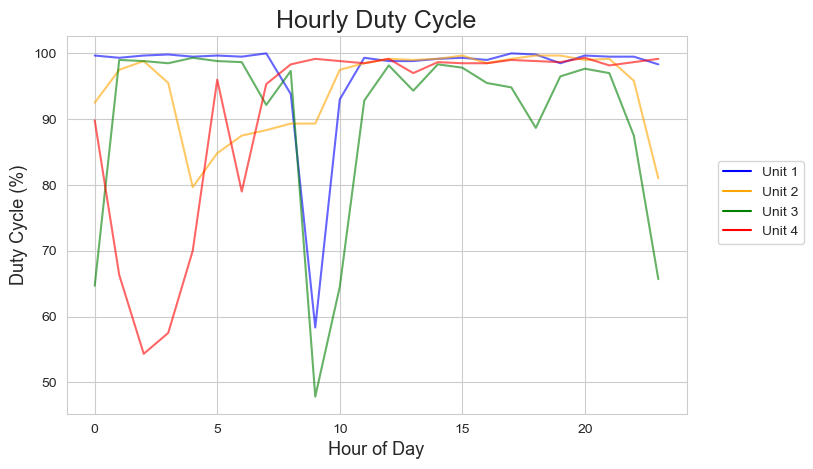

In [56]:
plt.figure(figsize=(8,5), dpi=100)

palette = ['blue','orange','green','red']
sns.lineplot(x='Hour', y='Duty Cycle (%)', hue='Unit', palette=palette, alpha=0.6, data=hourly_df)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Duty Cycle (%)', fontsize=13)
plt.title('Hourly Duty Cycle', fontsize=18)
plt.legend(loc=(1.05,0.45))

### Temperature Compliance

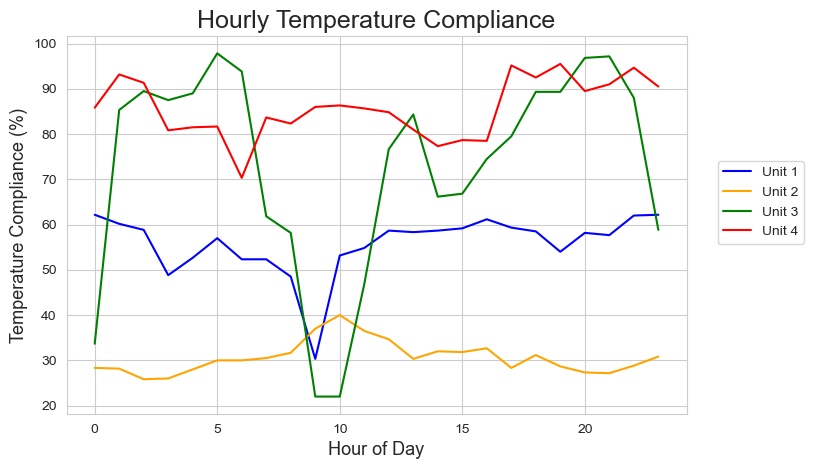

In [57]:
plt.figure(figsize=(8,5), dpi=100)

palette = ['blue','orange','green','red']
sns.lineplot(x='Hour', y='Temp Compliance (%)', hue='Unit', palette=palette, data=hourly_df)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Temperature Compliance (%)', fontsize=13)
plt.title('Hourly Temperature Compliance', fontsize=18)
plt.legend(loc=(1.05,0.45))

### Energy Consumption

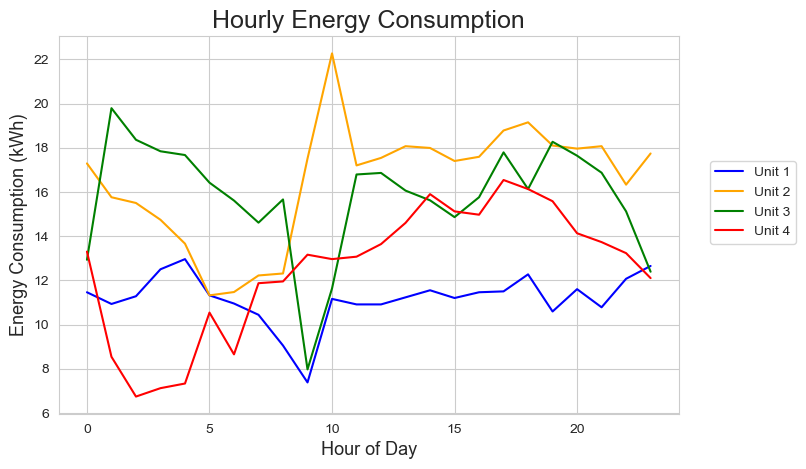

In [58]:
plt.figure(figsize=(8,5), dpi=100)

palette = ['blue','orange','green','red']
sns.lineplot(x='Hour', y='Energy Consumption (kWh)', hue='Unit', palette=palette, data=hourly_df)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Energy Consumption (kWh)', fontsize=13)
plt.title('Hourly Energy Consumption', fontsize=18)
plt.legend(loc=(1.05,0.45))

---
### Calculating the Error b/w Daily and Hourly analysis 

Let's see the error b/w average values from daily and hourly analysis for all the three metrics accross all the units

#### Energy Consumption

In [59]:
# List of errors
ec_error = []
    
for unit in daily_df['Unit'].unique():
    
    # Calculating total energy spent by each unit from daily data
    ecd = daily_df[daily_df['Unit'] == unit]['Energy Consumption (kWh)'].sum()
    
    # Calculating total energy spent by each unit from hourly data
    ech = hourly_df[hourly_df['Unit'] == unit]['Energy Consumption (kWh)'].sum()
    
    # Calculating the error %
    err = abs(round(100*(ecd-ech)/ecd, 4))
    
    # Appending to the error list
    ec_error.append(err)

In [60]:
ec_error

[0.0075, 0.0025, 0.0, 0.0]

#### Duty Cycle & Temp Compliance

In [61]:
def calc_error(col):
    
    # List of errors
    error = []
    
    for unit in daily_df['Unit'].unique():
        
        # Calculating the mean for each unit from daily data 
        d = daily_df[daily_df['Unit'] == unit][col].mean()
        
        # Calculating the mean for each unit from hourly data 
        h = hourly_df[hourly_df['Unit'] == unit][col].mean()
        
        # Calculating the error %
        err = abs(round((100 * (d-h)/d),5))
        
        # Appending to the error list
        error.append(err)

    return error

In [62]:
# Duty Cycle
dc_error = calc_error('Duty Cycle (%)')
dc_error

[0.00111, 0.00123, 9e-05, 0.00119]

In [63]:
# Temp Compliance
tc_error = calc_error('Temp Compliance (%)')
tc_error

[0.00194, 0.00462, 0.00251, 0.00243]

#### Collating the results into a Data Frame

In [64]:
dic = {'Unit': daily_df['Unit'].unique(),
       'Duty Cycle': dc_error,
       'Temp Compliance': tc_error,
       'Energy Consumption': ec_error}

error_df = pd.DataFrame(dic)
error_df

,Unit,Duty Cycle,Temp Compliance,Energy Consumption
0,Unit 1,0.00111,0.00194,0.0075
1,Unit 2,0.00123,0.00462,0.0025
2,Unit 3,0.00009,0.00251,0.0000
3,Unit 4,0.00119,0.00243,0.0000


#### Vizualizing the errors

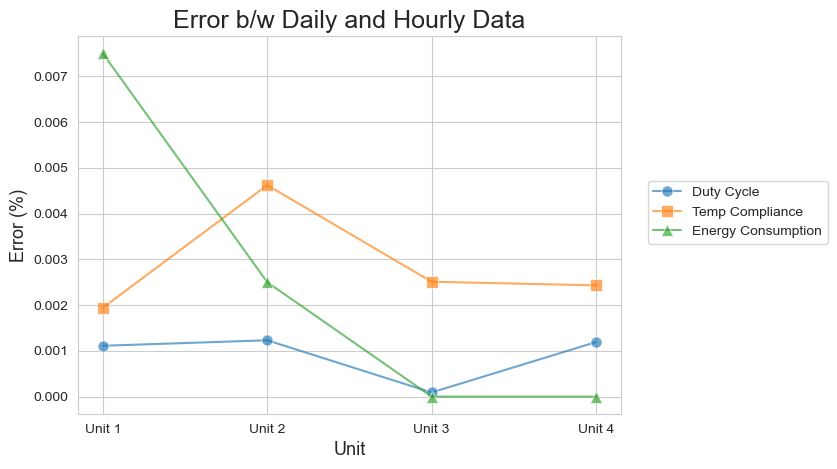

In [65]:
labels = [('Duty Cycle','o'), ('Temp Compliance','s'), ('Energy Consumption','^')]
plt.figure(figsize=(7,5), dpi=100)

for col,mark in labels:
    sns.lineplot(x='Unit', y=col, data=error_df, marker=mark, ms=8, label=col, alpha=0.65)
    
plt.ylabel('Error (%)', fontsize=13)
plt.xlabel('Unit', fontsize=13)
plt.title('Error b/w Daily and Hourly Data', fontsize=18)
plt.legend(loc =(1.05,0.45))

### Exporting the Data

In [66]:
# daily.to_excel('Daily Data.xlsx', index=False)

In [67]:
# hourly_df.to_excel('Hourly Data.xlsx', index=False)

In [68]:
# error_df.to_excel('Errors.xlsx', index=False)

## Thank You!